### 네이버 영화 평점 데이터 분석하기

In [7]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

page = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220504"

html = urlopen(page)

soup = BeautifulSoup(html, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220504" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [8]:
soup.find_all('div', class_='tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=187320" title="씽2게더">씽2게더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10001" title="시네마 천국">시네마 천국</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213733" title="극장판 주술회전 0">극장판 주술회전 0</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=29059" title="피아니스트의 전설">피아니스트의 전설</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10058" title="벤허">벤허</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=75378" title="파수꾼">파수꾼</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=31422" title="와이키키 브라더스">와이키키 브라더스</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=96

*   div 태그이면서 class가 tit5인 것을 찾아 영화의 이름을 찾는다.

In [10]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.naver?code=187320" title="씽2게더">씽2게더</a>

In [9]:
soup.find_all('div', 'tit5')[0].a.string

'씽2게더'

*   string을 통해 html태그 안에 있는 문자열을 뽑는다.

In [11]:
soup.find_all('td', 'point')[0]

<td class="point">9.39</td>

*   td태그에 class가 point인 것을 찾아 영화의 평점을 추출한다.

In [12]:
soup.find_all('td', 'point')[0].string

'9.39'

In [13]:
date = pd.date_range('2022-03-15', periods=90, freq='D')
date

DatetimeIndex(['2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
               '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30',
               '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03',
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
               '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
               '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15',
               '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19',
               '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23',
               '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01',
               '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
               '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09',
      

*   2022-03-15 ~ 2022-06-12 까지의 데이터들을 가지고 분석할 것이다.

In [14]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}"
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

C:\Users\rladl\AppData\Local\Temp\ipykernel_18452\3621534588.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date):


  0%|          | 0/90 [00:00<?, ?it/s]

*   movie_data 는 분석하는 기간을 저장한다.
*   movie_name는 각 기간별 영화의 이름을 저장한다. 
*   movie_point는 각 기간별 영화의 평점을 저장한다.

In [33]:
len(movie_date), len(movie_name), len(movie_point)

(3629, 3629, 3629)

In [35]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})

movie.head(10)

,date,name,point
0,2022-03-15,씽2게더,9.42
1,2022-03-15,극장판 주술회전 0,9.32
2,2022-03-15,코다,9.19
3,2022-03-15,전투왕,9.18
4,2022-03-15,스파이더맨: 노 웨이 홈,8.85
5,2022-03-15,화양연화,8.80
6,2022-03-15,드라이브 마이 카,8.53
7,2022-03-15,광대: 소리꾼,8.42
8,2022-03-15,이상한 나라의 수학자,8.41
9,2022-03-15,어나더 라운드,8.28


In [36]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3629 non-null   datetime64[ns]
 1   name    3629 non-null   object        
 2   point   3629 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 85.2+ KB


*   point 변수 자료 타입을 문자열 -> 실수형으로 전환한다. 평점으로 분석하기 위해서 문자형이 아닌 실수형으로 바꾼다.

In [37]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3629 non-null   datetime64[ns]
 1   name    3629 non-null   object        
 2   point   3629 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.2+ KB


In [38]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'])
movie_unique.head()

,point
name,
82년생 김지영,6.6700
가나의 혼인잔치: 언약,9.4100
개를 훔치는 완벽한 방법,9.0000
고양이를 부탁해,8.8100
공기살인,8.6122


In [39]:
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head(10)

,point
name,
극장판 주술회전 0,834.17
코다,777.46
드라이브 마이 카,759.60
씽2게더,742.44
어나더 라운드,696.41
이상한 나라의 수학자,687.87
스펜서,655.38
파수꾼,551.40
와이키키 브라더스,546.61


*   기간동안 누적된 영화의 평점(aggfunc=np.sum)을 내림차순(ascending=False)으로 정렬하여 보여준다.

In [40]:
tmp = movie.query('name == ["크루엘라"]')
tmp

,date,name,point
25,2022-03-16,크루엘라,9.2
49,2022-03-17,크루엘라,9.2
78,2022-03-18,크루엘라,9.2
108,2022-03-19,크루엘라,9.2
138,2022-03-20,크루엘라,9.2
169,2022-03-21,크루엘라,9.2
200,2022-03-22,크루엘라,9.2
232,2022-03-23,크루엘라,9.2
264,2022-03-24,크루엘라,9.2
301,2022-03-25,크루엘라,9.2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

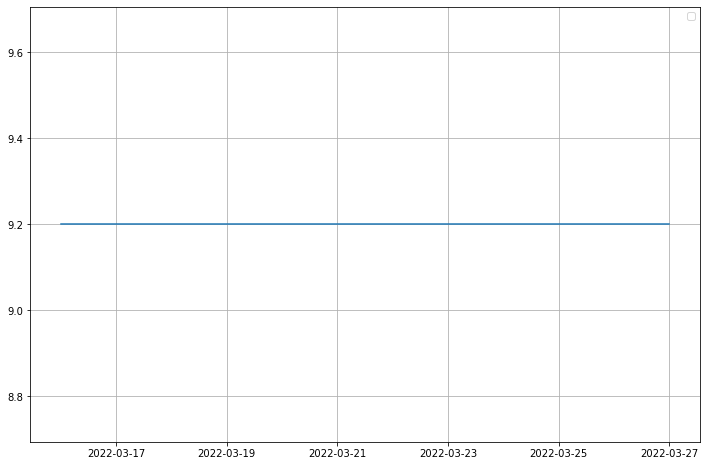

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.plot()

*   크루엘라 영화는 계속해서 9.2평점을 받은 것을 알 수 있다.

In [44]:
movie_best.head(10)

,point
name,
극장판 주술회전 0,834.17
코다,777.46
드라이브 마이 카,759.60
씽2게더,742.44
어나더 라운드,696.41
이상한 나라의 수학자,687.87
스펜서,655.38
파수꾼,551.40
와이키키 브라더스,546.61


In [45]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head()

point                                                            \
name       82년생 김지영 가나의 혼인잔치: 언약 개를 훔치는 완벽한 방법 고양이를 부탁해 공기살인 광대: 소리꾼  귀향 그녀에게   
date                                                                            
2022-03-15      NaN          NaN           NaN      NaN  NaN    8.42 NaN  NaN   
2022-03-16      NaN          NaN           NaN      NaN  NaN    8.42 NaN  NaN   
2022-03-17      NaN          NaN           NaN      NaN  NaN    8.42 NaN  NaN   
2022-03-18      NaN          NaN           NaN      NaN  NaN    8.42 NaN  NaN   
2022-03-19      NaN          NaN           NaN      NaN  NaN    8.42 NaN  NaN   

                                           ...                           \
name       극장판 귀멸의 칼날: 무한열차편 극장판 원피스 스탬피드  ... 피아니스트의 전설 하나-비 하우스 오브 구찌   
date                                       ...                            
2022-03-15               NaN          NaN  ...       NaN  NaN      7.91   
2022-03-16               NaN          NaN  ...       NaN  NaN       NaN   
2022-03-17               NaN          NaN  ...       NaN  NaN       NaN   
2022-03-18               NaN          NaN  ...       NaN  NaN       NaN   
2022-03-19               NaN          NaN  ...       NaN  NaN       NaN   

                                                                             
name       하이 스피드! –프리! 스타팅 데이즈  한공주 한여름의 판타지아 해적: 도깨비 깃발 해피 투게더 화양연화 환상의 빛  
date                                                                         
2022-03-15                  NaN  NaN       NaN       5.66    NaN  8.8   NaN  
2022-03-16                  NaN  NaN       NaN       5.65    NaN  8.8   NaN  
2022-03-17                  NaN  8.8       NaN       5.65    NaN  8.8   NaN  
2022-03-18                  NaN  8.8       NaN       5.64   9.19  8.8   NaN  
2022-03-19                  NaN  8.8       NaN       5.63   9.19  8.8   NaN  

[5 rows x 116 columns]

In [46]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [47]:
movie_pivot.head()

name,82년생 김지영,가나의 혼인잔치: 언약,개를 훔치는 완벽한 방법,고양이를 부탁해,공기살인,광대: 소리꾼,귀향,그녀에게,극장판 귀멸의 칼날: 무한열차편,극장판 원피스 스탬피드,...,피아니스트의 전설,하나-비,하우스 오브 구찌,하이 스피드! –프리! 스타팅 데이즈,한공주,한여름의 판타지아,해적: 도깨비 깃발,해피 투게더,화양연화,환상의 빛
date,,,,,,,,,,,,,,,,,,,,,
2022-03-15,NaN,NaN,NaN,NaN,NaN,8.42,NaN,NaN,NaN,NaN,...,NaN,NaN,7.91,NaN,NaN,NaN,5.66,NaN,8.8,NaN
2022-03-16,NaN,NaN,NaN,NaN,NaN,8.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.65,NaN,8.8,NaN
2022-03-17,NaN,NaN,NaN,NaN,NaN,8.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.8,NaN,5.65,NaN,8.8,NaN
2022-03-18,NaN,NaN,NaN,NaN,NaN,8.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.8,NaN,5.64,9.19,8.8,NaN
2022-03-19,NaN,NaN,NaN,NaN,NaN,8.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.8,NaN,5.63,9.19,8.8,NaN


In [48]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [49]:
movie['name'].values

array(['씽2게더', '극장판 주술회전 0', '코다', ..., '로스트 시티', '노회찬6411', '서울괴담'],
      dtype=object)

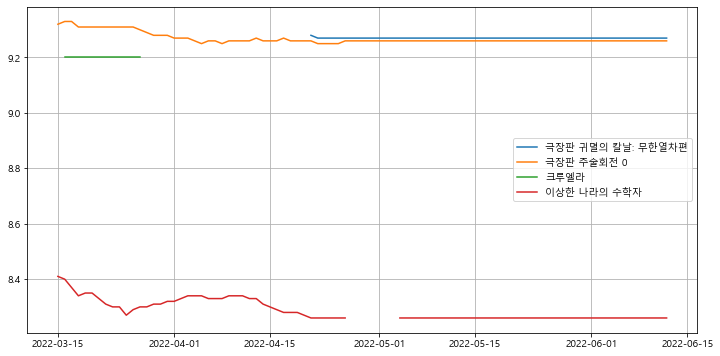

In [50]:
target_col = ['극장판 귀멸의 칼날: 무한열차편', '극장판 주술회전 0', '크루엘라', '이상한 나라의 수학자']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

*   내가 관심있는 영화 4개를 분석해봤을 때 영화 "귀멸의 칼날"이 나온 이후 "주술회전" 영화보다 평점이 계속해서 높고 애니메이션 영화가 "크루엘라", "이상한 나라의 수학자" 영화보다 평점이 높은 것을 알 수 있고 "이상한 나라의 수학자"는 3개의 영화와 달리 평점이 8.2~8.4 사이를 유지하고 있으며 9점 이상을 받은 적이 없다.